In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2
#%matplotlib qt

In [2]:
from skdim import commonfuncs
from skdim import global_id
from skdim import local_id
from _commonfuncs import get_nn

import scipy
import numpy as np
import rpy2
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
import rpy2.robjects.packages as rpackages

import sklearn.datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

rpy2.robjects.numpy2ri.activate()
utils = rpackages.importr('utils')
#utils.install_packages('intrinsicDimension')
#utils.install_packages('ider')
intdimr = rpackages.importr('intrinsicDimension')
ider   = rpackages.importr('ider')
#r_base = rpackages.importr('base')

In [3]:
commonfuncs.get_classes_dicts()

({'ESS': local_id._ESS.ESS,
  'FisherS': local_id._FisherS.FisherS,
  'MOM': local_id._MOM.MOM,
  'MiND_ML': local_id._MiND_ML.MiND_ML,
  'TLE': local_id._TLE.TLE,
  'lPCA': local_id._PCA.lPCA},
 {'CorrInt': global_id._CorrInt.CorrInt,
  'DANCo': global_id._DANCo.DANCo,
  'KNN': global_id._KNN.KNN,
  'MLE': global_id._MLE.MLE,
  'Mada': global_id._Mada.Mada,
  'TwoNN': global_id._TwoNN.TwoNN})

In [ ]:
data=np.random.random((200,10))

In [3]:
_3ball = commonfuncs.randsphere(1000,3,4)[0]
swissroll = sklearn.datasets.make_swiss_roll(n_samples=2000, noise=0.1, random_state=None)[0]
s_curve = sklearn.datasets.make_s_curve(n_samples=500, noise=0.1, random_state=None)[0]
plt.scatter(_3ball[:,0],_3ball[:,1])
plt.scatter(swissroll[:,0],swissroll[:,2])
plt.scatter(s_curve[:,0],s_curve[:,2])
plt.axis('equal')

<IPython.core.display.Javascript object>

(-10.855332672598978,
 14.06934946535082,
 -12.588801058634198,
 15.593874134219863)

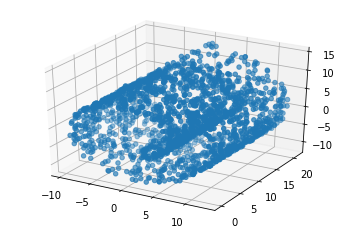

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#plt.scatter(s_curve[:,0],s_curve[:,1],s_curve[:,2])
ax.scatter(swissroll[:,0],swissroll[:,1],swissroll[:,2])

In [6]:
res = intdimr.pcaLocalDimEst(data,ver='FO')
r_pca = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.dancoDimEst(data,k=10,D=10)
r_danco = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.knnDimEst(data,k=10,ps=np.arange(11,50),M=5,gamma=2)
r_knn = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.maxLikGlobalDimEst(data,k=20)
r_gmle = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.maxLikLocalDimEst(data)
r_lmle = dict(zip(res.names,[np.array(i) for i in res]))

res = intdimr.maxLikPointwiseDimEst(data,k=20)
r_pmle = np.array([i[0] for i in res])

res = intdimr.pcaOtpmPointwiseDimEst(data,N=50)
r_pcaOtpm = [np.array([i[0] for i in res]), np.array([i[1] for i in res])]


r_corint = np.array(ider.corint(data,k1=10,k2=20))
r_mada = np.array(ider.mada(data,local=True,k=20))

R[write to console]: Computing DANCo calibration data for N = 500, k = 10 for dimensions 1 to 10



In [3]:
corint = global_id.CorrInt().fit(data)
danco = global_id.DANCo(D=10).fit(data)
knn = global_id.KNN().fit(data)
mada = global_id.Mada(local=True,k=20).fit(data)
twonn = global_id.TwoNN().fit(data)

ess = local_id.ESS().fit(data)
fishers = local_id.FisherS().fit(data)
lpca = local_id.lPCA().fit(data)

KeyboardInterrupt: 